In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import datetime
# this allows plots to appear directly in the notebook
%matplotlib inline

In [49]:
# get the data
pd.options.display.max_columns = 9999
df = pd.read_csv('E:/Transit-Casa-Alex/Output/Modeling/2009/Tenth_Data.csv')
df.head()

,Unnamed: 0,STOP_ID,DOW,NUMDAYS,OBSDAYS,TRIP_STOPS,OBS_TRIP_STOPS,WGT_TRIP_STOPS,HEADWAY_S,FARE,STOP_LAT_x,STOP_LON_x,EOL,SOL,TIMEPOINT,ARRIVAL_TIME_DEV,DEPARTURE_TIME_DEV,DWELL_S,DWELL,RUNTIME_S,RUNTIME,TOTTIME_S,TOTTIME,SERVMILES_S,SERVMILES,RUNSPEED_S,RUNSPEED,TOTSPEED_S,TOTSPEED,ONTIME5,ON,OFF,LOAD_ARR,LOAD_DEP,PASSMILES,PASSHOURS,WAITHOURS,FULLFARE_REV,PASSDELAY_DEP,PASSDELAY_ARR,RDBRDNGS,DOORCYCLES,WHEELCHAIR,BIKERACK,CAPACITY,VC,CROWDED,CROWDHOURS,STOP_LAT_y,STOP_LON_y,geometry,index_right,ALAND00,AWATER00,COUNTYFP00,CTIDFP00,NAME00,TRACTCE00,Id,Id2,Geography,Total_Pop,Total_Housing_Units,Workers_16_And_Over_Mean_Travel_Time_To_Work_(Minutes),VAC_RATE,OCC_RATE,PER_INCOME_0-15,PER_INCOME_15-50,PER_INCOME_50-100,PER_INCOME_100+,AVG_HH_SIZE,PER_HH_0VEH,POP_DEN_ACS,HH_DEN_ACS,HU_DEN_ACS,geometry_a,Average Hourly Price,parking_rate,PRICE1HR,PRICE2HR,PRICE3HR,PRICE4HR,PRICE12HR,PRICEDAY,PRICEDAYDISCOUNT,BART_FROMS,BART_TOS,CALTRAIN_OFF,CALTRAIN_ON,MUNI_RAIL_ALIGHTINGS,MUNI_RAIL_BOARDINGS,EDHLTH_RAC_SCALED,EDHLTH_WAC_SCALED,EMP_RAC_SCALED,EMP_WAC_SCALED,LEISER_RAC_SCALED,LEISER_WAC_SCALED,OTHER_RAC_SCALED,OTHER_WAC_SCALED,RETAIL_RAC_SCALED,RETAIL_WAC_SCALED,HOUSING_09_SCALED,NUM_BUS_STOPS,Count_,FID_1,STOP_LAT,STOP_LON,geometry_e,EDD_EMP,geometry_f
0,0,3001,1.0,21.0,21.000000,63.000000,9.500000,63.000000,12.870968,2.0,37.788530,-122.396044,0.0,0.0,1.0,1.072379,1.081051,0.0,0.547391,43.610000,48.905914,43.610000,49.453304,4.284000,4.284000,5.890000,5.295000,5.890000,5.225000,0.650636,14.997088,4.519693,1162.028642,1172.506037,79.017948,18.063030,1.322061,29.994176,26.938116,25.339884,0.0,3.523233,0.000000,0.206557,645.034091,0.292776,0.017570,1.017228,37.788530,-122.396044,POINT (-122.396044 37.78853),5.0,562992.0,63060.0,75.0,6.075018e+09,176.02,17602.0,1400000US06075017602,6.075018e+09,"Census Tract 176.02, San Francisco County, Cal...",1054.0,1107.0,20.9,0.373080,0.626920,0.008646,0.324207,0.129683,0.537464,1.518732,0.354467,7.576295,4.988566,7.957266,POINT (6013806.632569867 2115133.54434165),317.0,0.717403,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1361.5,NaN,NaN,NaN,NaN,NaN,NaN,5.495661,58.078897,41.584791,3994.976236,3.736130,170.357958,27.184539,3706.208163,5.168461,60.331218,12.908306,5.0,0.0,4.0,37.788530,-122.396044,POLYGON ((-122.3942171872453 37.78855936227788...,6419.0,POLYGON ((-122.3942171872453 37.78855936227788...
1,1,3003,1.0,20.0,19.333333,61.333333,10.666667,61.264825,15.159260,2.0,37.781827,-122.391945,0.0,0.0,0.0,1.078691,1.222782,0.0,8.853592,40.966667,30.279509,40.966667,39.133100,6.133333,6.125866,8.970000,12.183333,8.970000,9.453333,0.765185,58.481198,18.637329,1029.535938,1069.379807,102.946060,11.191763,6.057064,116.962396,157.240873,142.701903,0.0,54.225016,0.027273,0.000000,707.079545,0.266768,0.032016,1.242915,37.781827,-122.391945,POINT (-122.391945 37.781827),10.0,1104393.0,376679.0,75.0,6.075018e+09,179.01,17901.0,1400000US06075017901,6.075018e+09,"Census Tract 179.01, San Francisco County, Cal...",8416.0,5228.0,28.0,0.220735,0.779265,0.055228,0.179921,0.191949,0.572901,2.065783,0.242023,30.839019,14.928489,19.157128,POINT (6014941.534248216 2112669.363861877),306.0,1.052738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.458089,7.142484,178.682736,2234.048853,14.819414,170.376866,122.031086,2013.646230,12.374148,42.883273,373.257441,2.0,0.0,5.0,37.781827,-122.391945,POLYGON ((-122.3901183504868 37.78185629881523...,1790.0,POLYGON ((-122.3901183504868 37.78185629881523...
2,2,3004,1.0,20.0,19.333333,55.666667,9.333333,55.626478,15.288476,2.0,37.781854,-122.392232,0.0,0.0,0.0,0.784972,0.876414,0.0,5.179305,50.666667,29.535586,50.666667,34.714891,6.997667,6.988946,8.436667,14.590000,8.436667,12.550000,0.619521,8.878226,53.150037,1030.624931,986.353120,127.021696,11.151654,0.923621,17.756451,23.462475,21.929398,0.0,46.365203,0.435076,0.000000,650.427273,0.291287,0.021341,0.742227,37.781854,-122.392232,POINT (-122.392232 37.781854),10.0,1104393.0,376679.0,75.0,6.075018e+09,179.01,17901.0,140

In [50]:
for column in df.columns.sort_values():
    print(column)

ALAND00
ARRIVAL_TIME_DEV
AVG_HH_SIZE
AWATER00
Average Hourly Price
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
COUNTYFP00
CROWDED
CROWDHOURS
CTIDFP00
Count_
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FID_1
FULLFARE_REV
Geography
HEADWAY_S
HH_DEN_ACS
HOUSING_09_SCALED
HU_DEN_ACS
Id
Id2
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NAME00
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
PER_HH_0VEH
PER_INCOME_0-15
PER_INCOME_100+
PER_INCOME_15-50
PER_INCOME_50-100
POP_DEN_ACS
PRICE12HR
PRICE1HR
PRICE2HR
PRICE3HR
PRICE4HR
PRICEDAY
PRICEDAYDISCOUNT
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SOL
STOP_ID
STOP_LAT
STOP_LAT_x
STOP_LAT_y
STOP_LON
STOP_LON_x
STOP_LON_y
TIMEPOINT
TO

In [51]:
#average ons and offs
df['AVG_RIDE'] = (df['ON'] + df['OFF'])/2

#drop itself out of a stops competing stops
df['NUM_BUS_STOPS'] = df['NUM_BUS_STOPS'] - 1

In [54]:
#deleted stops that were in San Mateo
df = df.drop(df[np.isnan(df['NUM_BUS_STOPS'])].index)

In [58]:
max(df['NUM_BUS_STOPS'])


13.0

In [60]:
print(len(df))

3588


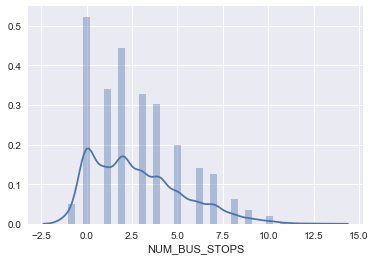

In [59]:
sns.distplot(df['NUM_BUS_STOPS'])

3563


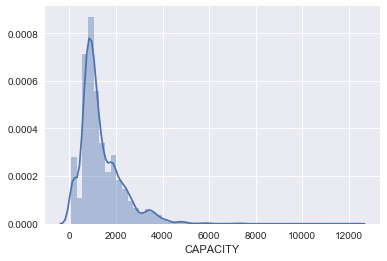

In [62]:
df = df.drop(df[np.isnan(df['ON'])].index)
print(len(df))
sns.distplot(df['CAPACITY'])

In [63]:
for column in df.columns.sort_values():
    print(column)

ALAND00
ARRIVAL_TIME_DEV
AVG_HH_SIZE
AVG_RIDE
AWATER00
Average Hourly Price
BART_FROMS
BART_TOS
BIKERACK
CALTRAIN_OFF
CALTRAIN_ON
CAPACITY
COUNTYFP00
CROWDED
CROWDHOURS
CTIDFP00
Count_
DEPARTURE_TIME_DEV
DOORCYCLES
DOW
DWELL
DWELL_S
EDD_EMP
EDHLTH_RAC_SCALED
EDHLTH_WAC_SCALED
EMP_RAC_SCALED
EMP_WAC_SCALED
EOL
FARE
FID_1
FULLFARE_REV
Geography
HEADWAY_S
HH_DEN_ACS
HOUSING_09_SCALED
HU_DEN_ACS
Id
Id2
LEISER_RAC_SCALED
LEISER_WAC_SCALED
LOAD_ARR
LOAD_DEP
MUNI_RAIL_ALIGHTINGS
MUNI_RAIL_BOARDINGS
NAME00
NUMDAYS
NUM_BUS_STOPS
OBSDAYS
OBS_TRIP_STOPS
OCC_RATE
OFF
ON
ONTIME5
OTHER_RAC_SCALED
OTHER_WAC_SCALED
PASSDELAY_ARR
PASSDELAY_DEP
PASSHOURS
PASSMILES
PER_HH_0VEH
PER_INCOME_0-15
PER_INCOME_100+
PER_INCOME_15-50
PER_INCOME_50-100
POP_DEN_ACS
PRICE12HR
PRICE1HR
PRICE2HR
PRICE3HR
PRICE4HR
PRICEDAY
PRICEDAYDISCOUNT
RDBRDNGS
RETAIL_RAC_SCALED
RETAIL_WAC_SCALED
RUNSPEED
RUNSPEED_S
RUNTIME
RUNTIME_S
SERVMILES
SERVMILES_S
SOL
STOP_ID
STOP_LAT
STOP_LAT_x
STOP_LAT_y
STOP_LON
STOP_LON_x
STOP_LON_y
TIM

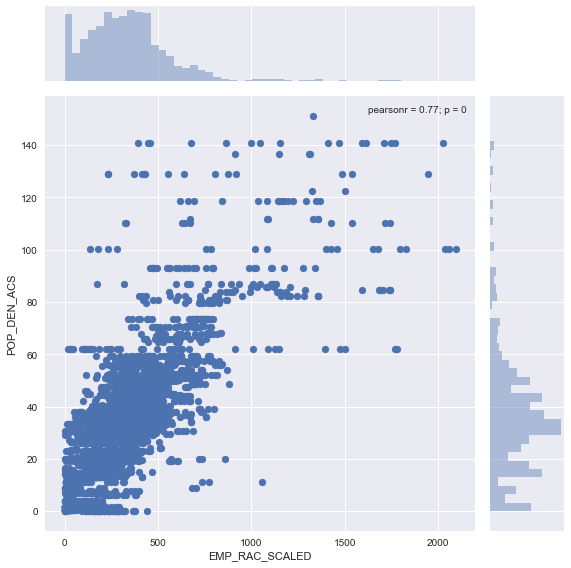

In [64]:
sns.jointplot(x="EMP_RAC_SCALED", y="POP_DEN_ACS", data=df, size=8)

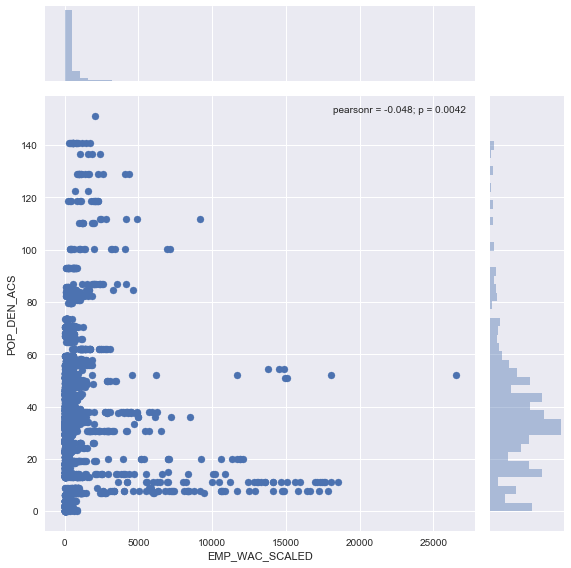

In [65]:
sns.jointplot(x="EMP_WAC_SCALED", y="POP_DEN_ACS", data=df, size=8)

In [32]:
#df['MONTH'] = pd.to_datetime(df['MONTH'])

In [34]:
df['Month'] = df['MONTH'].apply(lambda row: row.month)

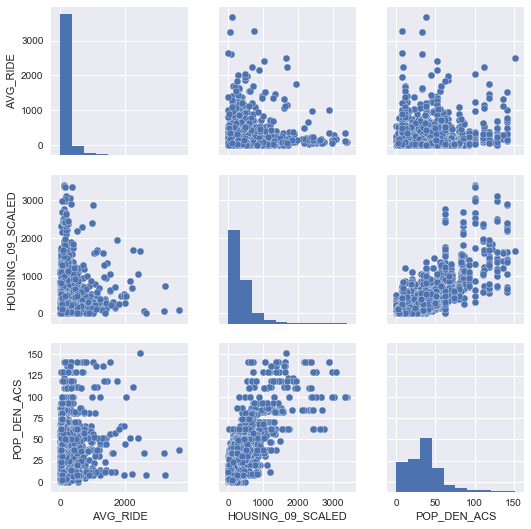

In [66]:
fig = sns.pairplot(df[[ 'AVG_RIDE','HOUSING_09_SCALED','POP_DEN_ACS']])
fig.savefig('E:\Transit-Casa-Alex\Output\Seaborn Pictures (Data Exploration)/Census_Block_Data.jpg')

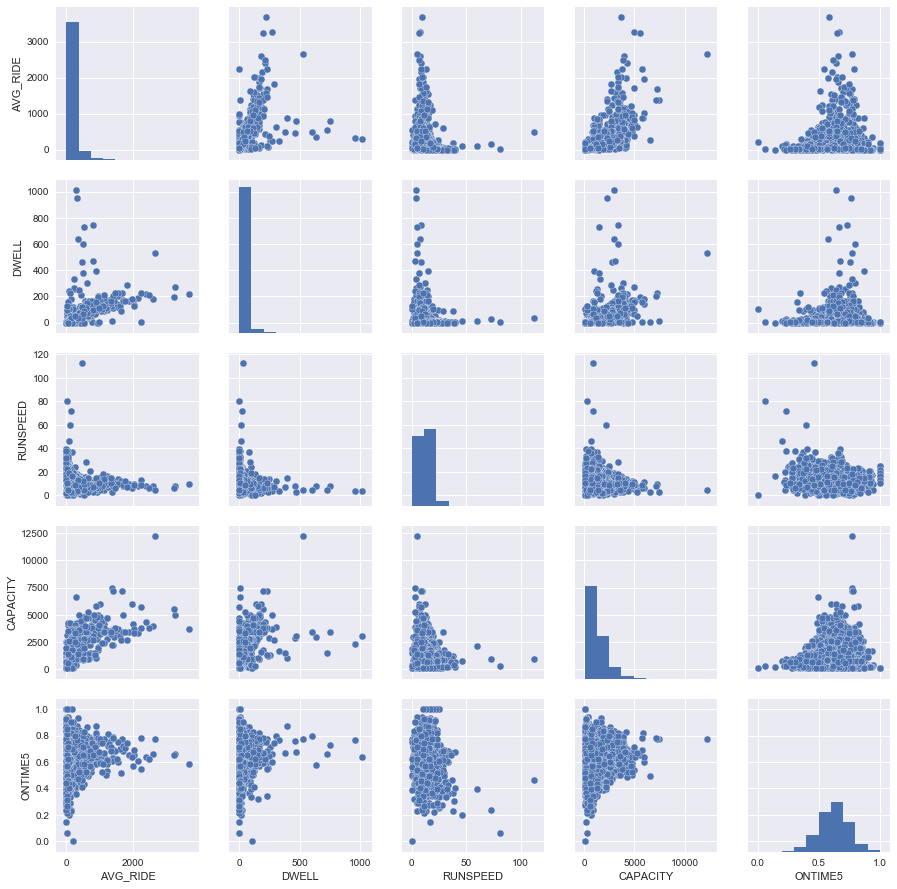

In [67]:
fig = sns.pairplot(df[['AVG_RIDE','DWELL','RUNSPEED', 'CAPACITY', 'ONTIME5']])
fig.savefig('E:\Transit-Casa-Alex\Output\Seaborn Pictures (Data Exploration)/Bus Performance.jpg')

In [68]:
import folium

In [72]:
folium.Map?